# Getting Started with Data Science in Julia

> [A]lways bite the bullet with regard to understanding the basics of the data first before you do anything else...
>
> \- Caitlin Smallwood, Vice President of Science and Algorithms at Netflix


The common workflow for data analysis is shown in the figure below and it is all centered around **data**
<img src="https://d33wubrfki0l68.cloudfront.net/571b056757d68e6df81a3e3853f54d3c76ad6efc/32d37/diagrams/data-science.png" width=400>

## Data: Build a strong relationship with your data.
*Based on work by Nassar Huda*

Every data science task has one main ingredient, the _data_! Most likely, you want to use your data to learn something new. But before the _new_ part, what about the data you already have? Let's make sure you can **read** it, **store** it, and **understand** it before you start using it.

Julia makes this step really easy with data structures and packages to process the data, as well as, existing functions that are readily usable on your data. 

The goal of this part is get you acquainted with some Julia's tools to manage your data.

We will be using the `programminglanguages.csv` data file in this part. Use the `readdir()` commands in Julia to verify that the file is present in your directory.

In [1]:
readdir()

26-element Array{String,1}:
 ".ipynb_checkpoints"
 "05. Conditionals.ipynb"
 "06. Functions.ipynb"
 "07. Packages.ipynb"
 "08. Plotting.ipynb"
 "09. Julia is fast.ipynb"
 "10. Multiple dispatch.ipynb"
 "11. Basic linear algebra.ipynb"
 "12. Factorizations and other fun.ipynb"
 "13.Calculate_pi.ipynb"
 "14.working_with_data.ipynb"
 "15.data_science_plotting.ipynb"
 "5"
 "Assignment 3.ipynb"
 "HPE-DSI_Julia_Remote Access.pptx"
 "HPE-DSI_Using_MS_Teams.pptx"
 "Julia_Course_code.txt"
 "MIT"
 "assignment1.ipynb"
 "assignment2.ipynb"
 "assignment3"
 "julia_intro.pdf"
 "myplot.png"
 "programminglanguages.csv"
 "texput.log"
 "to_0617"

# Basics of working with data

In this section we will cover the following steps associated with data handling. 

- Import
    - DataFrames
    - Reading from files
- Wrangling
    - Tidy
    - Missing values
    - Transform

Before you start with the importing, you have to be familiar with the building blocks of statistical analysis `DataFrames`. 

## DataFrames

DataFrame is the tabular representation of data, similar to spreadsheet or a data matrix. It is the most common datatype used in data analysis.

In Julia, dataframes are available through `DataFrames` package and they resemble with the `data.frames` from R. *Shout out to R fans!*

In [2]:
#using Pkg
#Pkg.add("DataFrames")
using DataFrames

Below is an example use of DataFrames using various random distributions and statistics package.

In [3]:
#Pkg.add("Distributions")
#Pkg.add("StatsBase")
#Pkg.add("Random")

In [4]:
using Distributions, StatsBase, Random
Random.seed!(825)
N = 5
df1 = DataFrame(
    x1 = rand(Normal(2,1),N),
    x2 = [sample(["High","Medium","Low"],pweights([0.25,0.45,0.3])) for i=1:N],
    x3 = rand(Pareto(2,1),N)
)

df1

,x1,x2,x3
,Float64,String,Float64
1,1.81025,High,3.94796
2,3.1707,Medium,1.50681
3,1.05329,Medium,1.16226
4,2.9705,Medium,4.51493
5,2.21518,Low,1.08939


## Data importing

First you must import your data into Julia. This typically means that you take data stored in a file, database, or web API, and load it into a data frame in Julia. If you can’t get your data into Julia, you can’t do data science on it!

**Reading and writing to files is really easy in Julia.** <br>

Now let's load the `programminglanguages.csv` into Julia.

We'll use the `CSV` library package and its `CSV.read()` function as shown
below. You can use different delimiters with the function `CSV.read`, from the `CSV` package.

The legacy readdlm() function is now deprecated.

Its use would have been

`Pkg.add("DelimitedFiles") # for readdlm()
using DelimitedFiles  # Standard library in Base
P,H = readdlm("programminglanguages.csv", header=true)`

By default, `readdlm` will fill an array with the data stored in the input .csv file. If we set the keyword argument `header` to `true`, we'll get a second output array for just the headers.

In [5]:
#Pkg.add("CSV") # for CSV.read()
using CSV
P = CSV.read("programminglanguages.csv", header=true)

,year,language
,Int64,String
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [20]:
?DataFrame

search: DataFrame DataFrame! DataFrames DataFrameRow SubDataFrame



```
DataFrame <: AbstractDataFrame
```

An AbstractDataFrame that stores a set of named columns

The columns are normally AbstractVectors stored in memory, particularly a Vector or CategoricalVector.

# Constructors

```julia
DataFrame(columns::AbstractVector, names::AbstractVector{Symbol};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::AbstractVector, names::AbstractVector{<:AbstractString};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::NTuple{N,AbstractVector}, names::NTuple{N,Symbol};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::NTuple{N,AbstractVector}, names::NTuple{N,<:AbstractString};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::Matrix, names::AbstractVector{Symbol}; makeunique::Bool=false)
DataFrame(columns::Matrix, names::AbstractVector{<:AbstractString};
          makeunique::Bool=false)
DataFrame(kwargs...)
DataFrame(pairs::Pair{Symbol,<:Any}...; makeunique::Bool=false, copycols::Bool=true)
DataFrame(pairs::Pair{<:AbstractString,<:Any}...; makeunique::Bool=false,
          copycols::Bool=true)
DataFrame() # an empty DataFrame
DataFrame(column_eltypes::AbstractVector, names::AbstractVector{Symbol},
          nrows::Integer=0; makeunique::Bool=false)
DataFrame(column_eltypes::AbstractVector, names::AbstractVector{<:AbstractString},
          nrows::Integer=0; makeunique::Bool=false)
DataFrame(ds::AbstractDict; copycols::Bool=true)
DataFrame(table; makeunique::Bool=false, copycols::Bool=true)
DataFrame(::Union{DataFrame, SubDataFrame}; copycols::Bool=true)
DataFrame(::GroupedDataFrame; keepkeys::Bool=true)
```

# Arguments

  * `columns` : a Vector with each column as contents or a Matrix
  * `names` : the column names
  * `makeunique` : if `false` (the default), an error will be raised if duplicates in `names` are found; if `true`, duplicate names will be suffixed with `_i` (`i` starting at 1 for the first duplicate).
  * `kwargs` : the key gives the column names, and the value is the column contents; note that the `copycols` keyword argument indicates if if vectors passed as columns should be copied so it is not possible to create a column whose name is `:copycols` using this constructor
  * `t` : elemental type of all columns
  * `nrows`, `ncols` : number of rows and columns
  * `column_eltypes` : element type of each column
  * `categorical` : a vector of `Bool` indicating which columns should be converted to `CategoricalVector`
  * `ds` : `AbstractDict` of columns
  * `table` : any type that implements the [Tables.jl](https://github.com/JuliaData/Tables.jl) interface; in particular a tuple or vector of `Pair{Symbol, <:AbstractVector}}` objects is a table.
  * `copycols` : whether vectors passed as columns should be copied; if set to `false` then the constructor will still copy the passed columns if it is not possible to construct a `DataFrame` without materializing new columns.

All columns in `columns` must be `AbstractVector`s and have the same length. An exception are `DataFrame(kwargs...)` and `DataFrame(pairs::Pair...)` form constructors which additionally allow a column to be of any other type that is not an `AbstractArray`, in which case the passed value is automatically repeated to fill a new vector of the appropriate length. As a particular rule values stored in a `Ref` or a `0`-dimensional `AbstractArray` are unwrapped and treated in the same way.

Additionally `DataFrame` can be used to collect a [`GroupedDataFrame`](@ref) into a `DataFrame`. In this case the order of rows in the result follows the order of groups in the `GroupedDataFrame` passed.

# Notes

The `DataFrame` constructor by default copies all columns vectors passed to it. Pass `copycols=false` to reuse vectors without copying them

If a column is passed to a `DataFrame` constructor or is assigned as a whole using `setindex!` then its reference is stored in the `DataFrame`. An exception to this rule is assignment of an `AbstractRange` as a column, in which case the range is collected to a `Vector`.

Because column types can vary, a `DataFrame` is not type stable. For performance-critical code, do not index into a `DataFrame` inside of loops.

# Examples

```julia
df = DataFrame()
v = ["x","y","z"][rand(1:3, 10)]
df1 = DataFrame(Any[collect(1:10), v, rand(10)], [:A, :B, :C])
df2 = DataFrame(A = 1:10, B = v, C = rand(10))
summary(df1)
describe(df2)
first(df1, 10)
df1.B
df2[!, :C]
df1[:, :A]
df1[1:4, 1:2]
df1[Not(1:4), Not(1:2)]
df1[1:2, [:A,:C]]
df1[1:2, r"[AC]"]
df1[:, [:A,:C]]
df1[:, [1,3]]
df1[1:4, :]
df1[1:4, :C]
df1[1:4, :C] = 40. * df1[1:4, :C]
[df1; df2]  # vcat
[df1 df2]  # hcat
size(df1)
```


Here we write our first small function. <br>
Now you can answer questions such as, "when was language X created?"

In [27]:
size(P)

(73, 2)

In [28]:
function language_created_year(P,language::String)
    loc = findfirst(P[:,2].==language)
    return P[loc,1]
end

language_created_year (generic function with 1 method)

In [29]:
language_created_year(P,"Julia")

2012

In [30]:
language_created_year(P,"julia")

MethodError: MethodError: no method matching getindex(::DataFrame, ::Nothing, ::Int64)
Closest candidates are:
  getindex(::DataFrame, !Matched::Colon, ::Union{AbstractString, Signed, Symbol, Unsigned}) at C:\Users\Victor\.julia\packages\DataFrames\kwVTY\src\dataframe\dataframe.jl:421
  getindex(::DataFrame, !Matched::typeof(!), ::Union{Signed, Unsigned}) at C:\Users\Victor\.julia\packages\DataFrames\kwVTY\src\dataframe\dataframe.jl:427
  getindex(::DataFrame, !Matched::Integer, ::Union{Signed, Unsigned}) at C:\Users\Victor\.julia\packages\DataFrames\kwVTY\src\dataframe\dataframe.jl:385
  ...

As expected, this will not return what you want, but thankfully, string manipulation is really easy in Julia!

In [31]:
function language_created_year_v2(P,language::String)
    loc = findfirst(lowercase.(P[:,2]).==lowercase.(language))
    return P[loc,1]
end
language_created_year_v2(P,"julia")

2012

To write to files, we can use `CSV.write`. <br>

Let's write this same data to a file with a different delimiter.

In [32]:
using CSV
CSV.write("programming_languages_data.txt", P, delim="-")

"programming_languages_data.txt"

We can now check that this worked using a shell command to glance at the file,

In [36]:
;head -10 programming_languages_data.txt

Base.IOError: IOError: could not spawn `head -10 programming_languages_data.txt`: no such file or directory (ENOENT)

and also check that we can use `CSV.read` to read our new text file correctly.

In [39]:
P_new_delim = CSV.read("programming_languages_data.txt",delim="-");
P == P_new_delim

true

Let's try to store the above data in a dictionary format!

First, let's initialize an empty dictionary

In [40]:
dict = Dict{Integer,Vector{String}}()

Dict{Integer,Array{String,1}} with 0 entries

Here we told Julia that we want `dict` to only accept integers as keys and vectors of strings as values.

However, we could have initialized an empty dictionary without providing this information (depending on our application).

In [41]:
dict2 = Dict()

Dict{Any,Any} with 0 entries

In [45]:
size(P,1)

73

This dictionary takes keys and values of any type!

Now, let's populate the dictionary with years as keys and vectors that hold all the programming languages created in each year as their values.

In [47]:
for i = 1:size(P,1)
    year,lang = P[i,:]
    
    if year in keys(dict)
        dict[year] = push!(dict[year],lang)
    else
        dict[year] = [lang]
    end
end

Now you can pick whichever year you want and find what programming languages were invented in that year

In [48]:
dict[2011]

8-element Array{String,1}:
 "Dart"
 "Kotlin"
 "Red"
 "Elixir"
 "Dart"
 "Kotlin"
 "Red"
 "Elixir"

## Data wrangling

Once you’ve imported your data, it is a good idea to tidy it. <font color='red'>Tidying your data means storing it in a consistent form that matches the semantics of the dataset with the way it is stored. In brief, when your data is tidy, each column is a variable, and each row is an observation.</font> Tidy data is important because the consistent structure lets you focus your struggle on questions about the data, not fighting to get the data into the right form for different functions.

Once you have tidy data, a common first step is to transform it. Transformation includes narrowing in on observations of interest (like all people in one city, or all data from the last year), creating new variables that are functions of existing variables (like computing speed from distance and time), and calculating a set of summary statistics (like counts or means). Together, tidying and transforming are called wrangling, because getting your data in a form that’s natural to work with often feels like a fight!

**Now back to DataFrames!**

Let's convert the `programminglanguages` dataset to a `DataFrame`

In [49]:
df = DataFrame(year = P[:,1], language = P[:,2])

,year,language
,Int64,String
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


You can access columns by header name, or column index.

In this case, `df[1]` is equivalent to `df.year` or `df[!, :year]`.

Note that if we want to index columns by header name, we precede the header name with a colon. In Julia, this means that the header names are treated as *symbols*.

In [50]:
df.year
df[!, :year]

73-element Array{Int64,1}:
 1951
 1952
 1954
 1955
 1957
 1957
 1958
 1958
 1959
 1959
 1959
 1962
 1962
    ⋮
 2003
 2005
 2006
 2007
 2009
 2010
 2011
 2011
 2011
 2011
 2012
 2014

**`DataFrames` provides some handy features when dealing with data**

First, it uses julia's "missing" type.

In [51]:
a = missing
typeof(a)

Missing

Let's see what happens when we try to add a "missing" type to a number.

In [52]:
a + 1

missing

`DataFrames` provides the `describe` function, which can give you quick statistics about each column in your dataframe 

In [53]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,year,1982.99,1951,1986.0,2014,,,Int64
2,language,,ALGOL 58,,dBase III,73,,String


### RDatasets

We can use `RDatasets` to play around with pre-existing datasets

The [`"iris"` dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a collection of measurements for three different species of the iris flower: Iris Setosa, Iris Virginica, and Iris Versicolor (shown below).  The measurements consist of length and width of the petal and sepal (part underneath the flower).

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width=400>

In [54]:
using Pkg; Pkg.add("RDatasets")
using RDatasets
iris = dataset("datasets", "iris")

   Updating registry at `C:\Users\Victor\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %5.3 % %55.1 %=============================>           ]  70.5 %

  Resolving package versions...
  Installed┌ Info: Replacing symlinks in tarball by their source files ...
│ "JuliaData-RData.jl-10693c5\\docs\\src\\LICENSE.md" => "JuliaData-RData.jl-10693c5\\docs\\src\\../../LICENSE.md"
│ "JuliaData-RData.jl-10693c5\\docs\\src\\NEWS.md" => "JuliaData-RData.jl-10693c5\\docs\\src\\../../NEWS.md"
└ @ Pkg.PlatformEngines D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.4\Pkg\src\PlatformEngines.jl:1027
 XML2_jll ─────────── v2.9.10+1
  Installed Mocking ──────────── v0.7.1
  Installed EzXML ────────────── v1.1.0
  Installed ExprTools ────────── v0.1.1
  Installed FileIO ───────────── v1.3.0
  Installed RData ────────────── v0.7.2
  Installed TimeZones ────────── v1.2.0
  Installed Libiconv_jll ─────── v1.16.0+5
  Installed CodecZlib ────────── v0.7.0
  Installed TranscodingStreams ─ v0.9.5
  Installed RDatasets ────────── v0.6.9
   Updating `C:\Users\Victor\.julia\environments\v1.4\Project.toml`
  [ce6b1742] + RDatasets v0.6.9
   Updating

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Note that data loaded with `dataset` is stored as a DataFrame. 😃

In [55]:
typeof(iris) 

DataFrame

The summary we get from `describe` on `iris` gives us a lot more information than the summary on `df`!

In [56]:
describe(iris)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,,,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,,,Float64
3,PetalLength,3.758,1.0,4.35,6.9,,,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,,,Float64
5,Species,,setosa,,virginica,3,,"CategoricalValue{String,UInt8}"


We'll use the fact that data vectors from the DataFrame can be selected with `mydf.mycol`:

In [57]:
iris.SepalLength

150-element Array{Float64,1}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

What is the average sepal width across all three species?

In [58]:
mean(iris.SepalWidth)

3.0573333333333337

Maximum and minimum?

In [59]:
@show minimum(iris.SepalWidth)
@show maximum(iris.SepalWidth)
extrema(iris.SepalWidth)

minimum(iris.SepalWidth) = 2.0
maximum(iris.SepalWidth) = 4.4


(2.0, 4.4)

Is petal width correlated with petal length?

In [62]:
cor(iris.PetalWidth, iris.PetalLength)

0.9628654314027961

### More on Missing Values

Julia 1.0 and beyond has native support for `missing` values. (Before Julia 1.0, this was done via the DataArrays.jl package.)
More information on using arrays with missing values can be found
[in the Julia documentation](https://docs.julialang.org/en/v1/manual/missing/#Arrays-With-Missing-Values-1).

In [63]:
foods = ["apple", "cucumber", "tomato", "banana"]
calories = [missing,47,22,105]
typeof(calories)

Array{Union{Missing, Int64},1}

In [64]:
#Pkg.add("Statistics")
using Statistics  # julia's standard library for stats
mean(calories)

missing

Missing values ruin everything! 😑

Luckily we can ignore them with `skipmissing`!

In [65]:
mean(skipmissing(calories))

58.0

In [66]:
prices = [0.85,1.6,0.8,0.6,]

4-element Array{Float64,1}:
 0.85
 1.6
 0.8
 0.6

In [67]:
dataframe_calories = DataFrame(item=foods,calories=calories)

,item,calories
,String,Int64?
1,apple,missing
2,cucumber,47
3,tomato,22
4,banana,105


In [68]:
dataframe_prices = DataFrame(item=foods,price=prices)

,item,price
,String,Float64
1,apple,0.85
2,cucumber,1.6
3,tomato,0.8
4,banana,0.6


We can also `join` two dataframes together

In [69]:
DF = innerjoin(dataframe_calories,dataframe_prices,on=:item)

,item,calories,price
,String,Int64?,Float64
1,apple,missing,0.85
2,cucumber,47,1.6
3,tomato,22,0.8
4,banana,105,0.6


### FileIO

In [71]:
Pkg.add("FileIO")
using FileIO
julialogo = download("https://avatars0.githubusercontent.com/u/743164?s=200&v=4","julialogo.png")

  Resolving package versions...
   Updating `C:\Users\Victor\.julia\environments\v1.4\Project.toml`
  [5789e2e9] + FileIO v1.3.0
   Updating `C:\Users\Victor\.julia\environments\v1.4\Manifest.toml`
 [no changes]


"julialogo.png"

Let's check that this download worked!

In [73]:
?readdir

search: readdir



```
readdir(dir::AbstractString=pwd();
    join::Bool = false,
    sort::Bool = true,
) -> Vector{String}
```

Return the names in the directory `dir` or the current working directory if not given. When `join` is false, `readdir` returns just the names in the directory as is; when `join` is true, it returns `joinpath(dir, name)` for each `name` so that the returned strings are full paths. If you want to get absolute paths back, call `readdir` with an absolute directory path and `join` set to true.

By default, `readdir` sorts the list of names it returns. If you want to skip sorting the names and get them in the order that the file system lists them, you can use `readir(dir, sort=false)` to opt out of sorting.

!!! compat "Julia 1.4"
    The `join` and `sort` keyword arguments require at least Julia 1.4.


# Examples

```julia-repl
julia> cd("/home/JuliaUser/dev/julia")

julia> readdir()
30-element Array{String,1}:
 ".appveyor.yml"
 ".git"
 ".gitattributes"
 ⋮
 "ui"
 "usr"
 "usr-staging"

julia> readdir(join=true)
30-element Array{String,1}:
 "/home/JuliaUser/dev/julia/.appveyor.yml"
 "/home/JuliaUser/dev/julia/.git"
 "/home/JuliaUser/dev/julia/.gitattributes"
 ⋮
 "/home/JuliaUser/dev/julia/ui"
 "/home/JuliaUser/dev/julia/usr"
 "/home/JuliaUser/dev/julia/usr-staging"

julia> readdir("base")
145-element Array{String,1}:
 ".gitignore"
 "Base.jl"
 "Enums.jl"
 ⋮
 "version_git.sh"
 "views.jl"
 "weakkeydict.jl"

julia> readdir("base", join=true)
145-element Array{String,1}:
 "base/.gitignore"
 "base/Base.jl"
 "base/Enums.jl"
 ⋮
 "base/version_git.sh"
 "base/views.jl"
 "base/weakkeydict.jl"```

julia> readdir(abspath("base"), join=true)
145-element Array{String,1}:
 "/home/JuliaUser/dev/julia/base/.gitignore"
 "/home/JuliaUser/dev/julia/base/Base.jl"
 "/home/JuliaUser/dev/julia/base/Enums.jl"
 ⋮
 "/home/JuliaUser/dev/julia/base/version_git.sh"
 "/home/JuliaUser/dev/julia/base/views.jl"
 "/home/JuliaUser/dev/julia/base/weakkeydict.jl"
```


Next, let's load the Julia logo, stored as a .png file

**NOTE: You may see errors below, that certain Image packages could not be found. If so:**
 - This is because these packages are specific to your OS, so aren't installed by default.
 - Simply run the suggested commands to install the packages, then try again. 

In [78]:
# These commands may vary depending on your operating system.
import Pkg; Pkg.add("QuartzImageIO")
import Pkg; Pkg.add("ImageMagick")

  Resolving package versions...
  Installed QuartzImageIO ──── v0.6.0
  Installed MappedArrays ───── v0.2.2
  Installed MosaicViews ────── v0.2.2
  Installed ColorVectorSpace ─ v0.8.5
  Installed PaddedViews ────── v0.5.5
  Installed OffsetArrays ───── v1.1.0
  Installed Graphics ───────── v1.0.2
┌ Info: Replacing symlinks in tarball by their source files ...
│ "JuliaImages-ImageCore.jl-a652c05\\docs\\src\\LICENSE.md" => "JuliaImages-ImageCore.jl-a652c05\\docs\\src\\../../LICENSE.md"
└ @ Pkg.PlatformEngines D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.4\Pkg\src\PlatformEngines.jl:1027
  Installed ImageCore ──────── v0.8.14
   Updating `C:\Users\Victor\.julia\environments\v1.4\Project.toml`
  [dca85d43] + QuartzImageIO v0.6.0
   Updating `C:\Users\Victor\.julia\environments\v1.4\Manifest.toml`
  [c3611d14] + ColorVectorSpace v0.8.5
  [a2bd30eb] + Graphics v1.0.2
  [a09fc81d] + ImageCore v0.8.14
  [dbb5928d] + MappedArrays v0.2.2
  [e94cdb99] + MosaicViews v0.2.2
  [6

In [79]:
X1 = load("julialogo.png")

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1260


200×200 Array{RGBA{N0f8},2} with eltype ColorTypes.RGBA{FixedPointNumbers.Normed{UInt8,8}}:
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 ⋮                            ⋱  
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,

We see here that Julia stores this logo as an array of colors.

In [80]:
@show typeof(X1);
@show size(X1);

typeof(X1) = Array{ColorTypes.RGBA{FixedPointNumbers.Normed{UInt8,8}},2}
size(X1) = (200, 200)


And if we load the Images package, it will display in Jupyter as an image:

In [81]:
Pkg.add("Images")
using Images

  Resolving package versions...
  Installed WoodburyMatrices ────────── v0.5.2
  Installed Images ──────────────────── v0.22.4
  Installed UnPack ──────────────────── v1.0.1
  Installed Ratios ──────────────────── v0.4.0
  Installed IndirectArrays ──────────── v0.5.1
  Installed MKL_jll ─────────────────── v2020.1.216+0
  Installed ImageAxes ───────────────── v0.6.4
  Installed CustomUnitRanges ────────── v1.0.0
  Installed RangeArrays ─────────────── v0.3.2
  Installed FFTW_jll ────────────────── v3.3.9+5
  Installed CatIndices ──────────────── v0.2.1
  Installed AxisArrays ──────────────── v0.4.3
  Installed Parameters ──────────────── v0.12.1
  Installed ImageMorphology ─────────── v0.2.7
  Installed Interpolations ──────────── v0.12.10
  Installed EllipsisNotation ────────── v0.4.0
  Installed IdentityRanges ──────────── v0.3.1
  Installed ImageShow ───────────────── v0.2.3
  Installed ComputationalResources ──── v0.3.2
  Installed AxisAlgorithms ──────────── v1.0.0
  Installed Ite

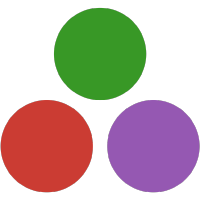

In [82]:
X1

### File types
In Julia, many file types are supported so you do not have to transfer a file from another language to a text file before you read it.

*Some packages that achieve this:*
MAT CSV NPZ JLD FASTAIO


Let's try using MAT to write a file that stores a matrix.

In [83]:
Pkg.add("MAT")
using MAT

  Resolving package versions...
  Installed HDF5_jll ──────── v1.10.5+5
  Installed Lz4_jll ───────── v1.9.2+0
  Installed Blosc_jll ─────── v1.14.3+1
  Installed Blosc ─────────── v0.7.0
  Installed BufferedStreams ─ v1.0.0
  Installed HDF5 ──────────── v0.13.2
  Installed MAT ───────────── v0.8.0
   Updating `C:\Users\Victor\.julia\environments\v1.4\Project.toml`
  [23992714] + MAT v0.8.0
   Updating `C:\Users\Victor\.julia\environments\v1.4\Manifest.toml`
  [a74b3585] + Blosc v0.7.0
  [0b7ba130] + Blosc_jll v1.14.3+1
  [e1450e63] + BufferedStreams v1.0.0
  [f67ccb44] + HDF5 v0.13.2
  [0234f1f7] + HDF5_jll v1.10.5+5
  [5ced341a] + Lz4_jll v1.9.2+0
  [23992714] + MAT v0.8.0
   Building HDF5 → `C:\Users\Victor\.julia\packages\HDF5\pAi1D\deps\build.log`
┌ Info: Precompiling MAT [23992714-dd62-5051-b70f-ba57cb901cac]
└ @ Base loading.jl:1260


In [84]:
A = rand(5,5)
matfile = matopen("densematrix.mat", "w") 
write(matfile, "A", A)
close(matfile)

Now try opening densematrix.mat with MATLAB!

In [85]:
newfile = matopen("densematrix.mat")
read(newfile,"A")

5×5 Array{Float64,2}:
 0.854748  0.596163  0.638126   0.905431  0.536143
 0.359823  0.931527  0.0953139  0.848798  0.218581
 0.449974  0.999279  0.998858   0.524805  0.173649
 0.680093  0.728569  0.133042   0.797358  0.888191
 0.889227  0.20845   0.704025   0.410951  0.187577

In [86]:
names(newfile)

1-element Array{String,1}:
 "A"

In [87]:
close(newfile)

## Exercise

#### 14.1 
Download the `nycflights13` dataset from https://raw.githubusercontent.com/estadistika/assets/master/data/nycflights13.csv and store it locally in `flights.csv`. Verfiy the download.

In [89]:
flights = download("https://raw.githubusercontent.com/estadistika/assets/master/data/nycflights13.csv","flights.csv")

"flights.csv"

In [90]:
flights

"flights.csv"

In [ ]:
readdir()

#### 14.2

Read the file in Julia so that all the `NA` values are read as `missing`

In [8]:
using CSV
using Statistics
using DataFrames, RDatasets, CSV, StatsBase

In [9]:
flights_df = CSV.read("flights.csv", header=true)

,Column1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
,Int64,Int64,Int64,Int64,String,Int64,String,String,Int64
1,1,2013,1,1,517,515,2,830,819
2,2,2013,1,1,533,529,4,850,830
3,3,2013,1,1,542,540,2,923,850
4,4,2013,1,1,544,545,-1,1004,1022
5,5,2013,1,1,554,600,-6,812,837
6,6,2013,1,1,554,558,-4,740,728
7,7,2013,1,1,555,600,-5,913,854
8,8,2013,1,1,557,600,-3,709,723
9,9,2013,1,1,557,600,-3,838,846


In [10]:
flights_df_missingstring = CSV.read("flights.csv", header=true,missingstring="NA")

,Column1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
,Int64,Int64,Int64,Int64,Int64?,Int64,Int64?,Int64?,Int64
1,1,2013,1,1,517,515,2,830,819
2,2,2013,1,1,533,529,4,850,830
3,3,2013,1,1,542,540,2,923,850
4,4,2013,1,1,544,545,-1,1004,1022
5,5,2013,1,1,554,600,-6,812,837
6,6,2013,1,1,554,558,-4,740,728
7,7,2013,1,1,555,600,-5,913,854
8,8,2013,1,1,557,600,-3,709,723
9,9,2013,1,1,557,600,-3,838,846


UndefVarError: UndefVarError: descirbe not defined

In [47]:
describe(flights_df_missingstring,stats.all)

UndefVarError: UndefVarError: stats not defined

In [13]:
flights_df_missingstring.isnull().sum()

ArgumentError: ArgumentError: column name :isnull not found in the data frame

In [23]:
?describe

search: describe



```
describe(io::IO, x)
```

For an object `x`, print descriptive statistics to `io`.

This generic function is owned by StatsBase.jl, which is the sole provider of the default definition.

---

```
describe(df::AbstractDataFrame; cols=:)
describe(df::AbstractDataFrame, stats::Union{Symbol, Pair}...; cols=:)
```

Return descriptive statistics for a data frame as a new `DataFrame` where each row represents a variable and each column a summary statistic.

# Arguments

  * `df` : the `AbstractDataFrame`
  * `stats::Union{Symbol, Pair}...` : the summary statistics to report. Arguments can be:

      * A symbol from the list `:mean`, `:std`, `:min`, `:q25`, `:median`, `:q75`, `:max`, `:eltype`, `:nunique`, `:first`, `:last`, and `:nmissing`. The default statistics used are `:mean`, `:min`, `:median`, `:max`, `:nunique`, `:nmissing`, and `:eltype`.
      * `:all` as the only `Symbol` argument to return all statistics.
      * A `name => function` pair where `name` is a `Symbol` or string. This will create a column of summary statistics with the provided name.
  * `cols` : a keyword argument allowing to select only a subset of columns from `df` to describe. Can be any column selector (`Symbol`, string or integer; `:`, `All`, `Between`, `Not`, a regular expression, or a vector of `Symbol`s, strings or integers).

# Details

For `Real` columns, compute the mean, standard deviation, minimum, first quantile, median, third quantile, and maximum. If a column does not derive from `Real`, `describe` will attempt to calculate all statistics, using `nothing` as a fall-back in the case of an error.

When `stats` contains `:nunique`, `describe` will report the number of unique values in a column. If a column's base type derives from `Real`, `:nunique` will return `nothing`s.

Missing values are filtered in the calculation of all statistics, however the column `:nmissing` will report the number of missing values of that variable. If the column does not allow missing values, `nothing` is returned. Consequently, `nmissing = 0` indicates that the column allows missing values, but does not currently contain any.

If custom functions are provided, they are called repeatedly with the vector corresponding to each column as the only argument. For columns allowing for missing values, the vector is wrapped in a call to `skipmissing`: custom functions must therefore support such objects (and not only vectors), and cannot access missing values.

# Examples

```julia
julia> df = DataFrame(i=1:10, x=0.1:0.1:1.0, y='a':'j')
10×3 DataFrame
│ Row │ i     │ x       │ y    │
│     │ Int64 │ Float64 │ Char │
├─────┼───────┼─────────┼──────┤
│ 1   │ 1     │ 0.1     │ 'a'  │
│ 2   │ 2     │ 0.2     │ 'b'  │
│ 3   │ 3     │ 0.3     │ 'c'  │
│ 4   │ 4     │ 0.4     │ 'd'  │
│ 5   │ 5     │ 0.5     │ 'e'  │
│ 6   │ 6     │ 0.6     │ 'f'  │
│ 7   │ 7     │ 0.7     │ 'g'  │
│ 8   │ 8     │ 0.8     │ 'h'  │
│ 9   │ 9     │ 0.9     │ 'i'  │
│ 10  │ 10    │ 1.0     │ 'j'  │

julia> describe(df)
3×8 DataFrame
│ Row │ variable │ mean   │ min │ median │ max │ nunique │ nmissing │ eltype   │
│     │ Symbol   │ Union… │ Any │ Union… │ Any │ Union…  │ Nothing  │ DataType │
├─────┼──────────┼────────┼─────┼────────┼─────┼─────────┼──────────┼──────────┤
│ 1   │ i        │ 5.5    │ 1   │ 5.5    │ 10  │         │          │ Int64    │
│ 2   │ x        │ 0.55   │ 0.1 │ 0.55   │ 1.0 │         │          │ Float64  │
│ 3   │ y        │        │ 'a' │        │ 'j' │ 10      │          │ Char     │

julia> describe(df, :min, :max)
3×3 DataFrame
│ Row │ variable │ min │ max │
│     │ Symbol   │ Any │ Any │
├─────┼──────────┼─────┼─────┤
│ 1   │ i        │ 1   │ 10  │
│ 2   │ x        │ 0.1 │ 1.0 │
│ 3   │ y        │ 'a' │ 'j' │

julia> describe(df, :min, :sum => sum)
3×3 DataFrame
│ Row │ variable │ min │ sum │
│     │ Symbol   │ Any │ Any │
├─────┼──────────┼─────┼─────┤
│ 1   │ i        │ 1   │ 55  │
│ 2   │ x        │ 0.1 │ 5.5 │
│ 3   │ y        │ 'a' │     │

julia> describe(df, :min, :sum => sum, cols=:x)
1×3 DataFrame
│ Row │ variable │ min     │ sum     │
│     │ Symbol   │ Float64 │ Float64 │
├─────┼──────────┼─────────┼─────────┤
│ 1   │ x        │ 0.1     │ 5.5     │
```

---

```
describe(a)
```

Pretty-print the summary statistics provided by [`summarystats`](@ref): the mean, minimum, 25th percentile, median, 75th percentile, and maximum.


In [22]:
any(isnan([:,:]))

MethodError: MethodError: no method matching isnan(::DataFrame)
Closest candidates are:
  isnan(!Matched::BigFloat) at mpfr.jl:893
  isnan(!Matched::Missing) at missing.jl:100
  isnan(!Matched::Float16) at float.jl:537
  ...

In [121]:
flights_df[1,10]=missing

ErrorException: setindex! not defined for CSV.Column{String,String}

In [120]:
for row=1:size(flights_df,1)
    for col=1:size(flights_df,2)
        if(flights_df[row,col]=="NA")
            flights_df[row,col]=missing
        end
    end
end

ErrorException: setindex! not defined for CSV.Column{String,String}

#### 14.3
Cleanup the data

*Hint:- handle the missing values using `dropmissing` from `DataFrames` package*

In [49]:
`=dropmissing(flights_df_missingstring)

,Column1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,2013,1,1,517,515,2,830,819
2,2,2013,1,1,533,529,4,850,830
3,3,2013,1,1,542,540,2,923,850
4,4,2013,1,1,544,545,-1,1004,1022
5,5,2013,1,1,554,600,-6,812,837
6,6,2013,1,1,554,558,-4,740,728
7,7,2013,1,1,555,600,-5,913,854
8,8,2013,1,1,557,600,-3,709,723
9,9,2013,1,1,557,600,-3,838,846


In [50]:
describe(flights_df_cleaned)

,variable,mean,min,median,max,nunique
,Symbol,Union…,Any,Union…,Any,Union…
1,Column1,168192.0,1,168252.0,336770,
2,year,2013.0,2013,2013.0,2013,
3,month,6.5648,1,7.0,12,
4,day,15.7408,1,16.0,31,
5,dep_time,1348.79,1,1400.0,2400,
6,sched_dep_time,1340.34,500,1355.0,2359,
7,dep_delay,12.5552,-43,-2.0,1301,
8,arr_time,1501.91,1,1535.0,2400,
9,sched_arr_time,1532.79,1,1554.0,2359,


#### 14.4
Find how many flights      
- Had an arrival delay of two or more hours  
- Flew to Houston (IAH or HOU)

*Hint:- use the filter function*

In [57]:
flights_df_cleaned["dest"]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[57]:1
└ @ Core In[57]:1


327346-element Array{String,1}:
 "IAH"
 "IAH"
 "MIA"
 "BQN"
 "ATL"
 "ORD"
 "FLL"
 "IAD"
 "MCO"
 "ORD"
 "PBI"
 "TPA"
 "LAX"
 ⋮
 "BGR"
 "BNA"
 "STL"
 "PWM"
 "SFO"
 "MCO"
 "BTV"
 "SYR"
 "BUF"
 "ROC"
 "BOS"
 "PSE"

In [70]:
?filter

search: filter filter! fieldtype fieldtypes



```
filter(f, a::AbstractArray)
```

Return a copy of `a`, removing elements for which `f` is `false`. The function `f` is passed one argument.

# Examples

```jldoctest
julia> a = 1:10
1:10

julia> filter(isodd, a)
5-element Array{Int64,1}:
 1
 3
 5
 7
 9
```

---

```
filter(f, d::AbstractDict)
```

Return a copy of `d`, removing elements for which `f` is `false`. The function `f` is passed `key=>value` pairs.

# Examples

```jldoctest
julia> d = Dict(1=>"a", 2=>"b")
Dict{Int64,String} with 2 entries:
  2 => "b"
  1 => "a"

julia> filter(p->isodd(p.first), d)
Dict{Int64,String} with 1 entry:
  1 => "a"
```

---

```
filter(f, itr::SkipMissing{<:AbstractArray})
```

Return a vector similar to the array wrapped by the given `SkipMissing` iterator but with all missing elements and those for which `f` returns `false` removed.

!!! compat "Julia 1.2"
    This method requires Julia 1.2 or later.


# Examples

```jldoctest
julia> x = [1 2; missing 4]
2×2 Array{Union{Missing, Int64},2}:
 1         2
  missing  4

julia> filter(isodd, skipmissing(x))
1-element Array{Int64,1}:
 1
```

---

```
filter(function, df::AbstractDataFrame)
filter(cols => function, df::AbstractDataFrame)
```

Return a copy of data frame `df` containing only rows for which `function` returns `true`.

If `cols` is not specified then the function is passed `DataFrameRow`s.

If `cols` is specified then the function is passed elements of the corresponding columns as separate positional arguments, unless `cols` is an `AsTable` selector, in which case a `NamedTuple` of these arguments is passed. `cols` can be any column selector (`Symbol`, string or integer; `:`, `All`, `Between`, `Not`, a regular expression, or a vector of `Symbol`s, strings or integers), and column duplicates are allowed if a vector of `Symbol`s, strings, or integers is passed.

Passing `cols` leads to a more efficient execution of the operation for large data frames.

See also: [`filter!`](@ref)

# Examples

```
julia> df = DataFrame(x = [3, 1, 2, 1], y = ["b", "c", "a", "b"])
4×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 3     │ b      │
│ 2   │ 1     │ c      │
│ 3   │ 2     │ a      │
│ 4   │ 1     │ b      │

julia> filter(row -> row.x > 1, df)
2×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 3     │ b      │
│ 2   │ 2     │ a      │

julia> filter(:x => x -> x > 1, df)
2×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 3     │ b      │
│ 2   │ 2     │ a      │

julia> filter([:x, :y] => (x, y) -> x == 1 || y == "b", df)
3×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 3     │ b      │
│ 2   │ 1     │ c      │
│ 3   │ 1     │ b      │

julia> filter(AsTable(:) => nt -> nt.x == 1 || nt.y == "b", df)
3×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 3     │ b      │
│ 2   │ 1     │ c      │
│ 3   │ 1     │ b      │
```


In [66]:
function ifiah(x)
    if (x=="IAH") || (x=="HOU")
        return true
        else return false
    end
end

ifiah (generic function with 1 method)

In [78]:
flights_df_cleaned_delayiah=filter([:dest, :arr_delay] => (dest, arr_delay) -> ((dest == "IAH") || (dest == "HOU")) && (arr_delay >= 120), flights_df_cleaned)

,Column1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,269,2013,1,1,1114,900,134,1447,1222
2,8811,2013,1,10,2137,1630,307,17,1925
3,12778,2013,1,15,1603,1446,77,1957,1757
4,13465,2013,1,16,1239,1043,116,1558,1340
5,17281,2013,1,20,2136,1700,276,27,2011
6,17961,2013,1,21,1708,1446,142,2032,1757
7,21392,2013,1,25,1409,1155,134,1710,1459
8,25970,2013,1,30,2312,2040,152,227,2345
9,26736,2013,1,31,1837,1635,122,2241,1945


In [79]:
describe(flights_df_cleaned_delayiah)

,variable,mean,min,median,max,nunique
,Symbol,Union…,Any,Union…,Any,Union…
1,Column1,190304.0,269,202455.0,331921,
2,year,2013.0,2013,2013.0,2013,
3,month,6.68636,1,7.0,12,
4,day,16.7727,1,18.0,31,
5,dep_time,1739.25,34,1843.0,2354,
6,sched_dep_time,1498.5,530,1630.0,2125,
7,dep_delay,183.659,41,168.0,761,
8,arr_time,1538.2,3,1914.5,2356,
9,sched_arr_time,1775.48,9,1920.0,2359,


In [80]:
flights_df_cleaned_delayiah["arr_delay"]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[80]:1
└ @ Core In[80]:1


220-element Array{Int64,1}:
 145
 292
 120
 138
 256
 155
 131
 162
 176
 165
 278
 126
 205
   ⋮
 190
 175
 146
 134
 228
 363
 321
 373
 329
 376
 157
 297